# Project 4
@Yumi Omori yd2247
## Dataset
Test your algorithm on two separate datasets (1) Use make_blobs function to generate synthetic data set from sklearn library. (2) Use an RGB image to cluster the R,G,B data into K clusters to demonstrate image compression. Display images before and after
## Requirements
1. Use sklearn library to generate the synthetic data for k-means clustering.
  
  *   We set the total number of instances to be 300
  *   The number of centers is 4 with the standard deviation 0.6

2. Plot the generated data with labels by using matplotlib
3. Implement the K-means function return the labels and centers
4. Fit the model on the dataset (default seed) and plot the figure
5. Fit the model on the dataset (seed=2) and plot the figure
6. Implement the K-means++ function return the labels and centers
7. Fit the model on the dataset (default seed) and plot the figure
8. Fit the model on the dataset (seed=2) and plot the figure
9. Compare the results from 4,5,7 and 8. State your observations

In [3]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
# or you can use opencv ## conda install -c conda-forge opencv
import cv2
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram


1. Use sklearn library to generate the synthetic data for k-means clustering.
  
  *   We set the total number of instances to be 300
  *   The number of centers is 4 with the standard deviation 0.6



In [4]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=4)

2. Plot the generated data with labels by using matplotlib

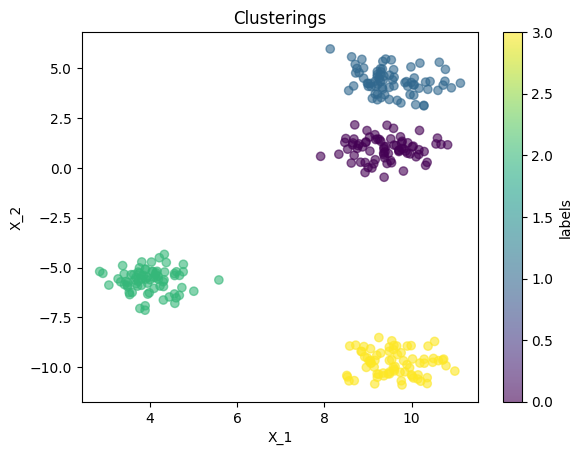

In [5]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, cmap = 'viridis', alpha=0.6)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Clusterings')
plt.colorbar(label = 'labels')
plt.show()



3. Implement the K-means function return the labels and centers
6. Implement the K-means++ function return the labels and centers

Initialize k means with random values
--> For a given number of iterations:

   --> Iterate through items:
  
       --> Find the mean closest to the item by calculating
       the euclidean distance of the item with each of the means
      
       --> Assign item to mean
      
       --> Update mean by shifting it to the average of the items in that cluster


In [6]:
class KMeans:
  def __init__(self, X, clusters=4, max_iterations=500):
    self.clusters = clusters
    self.iterations = max_iterations
    self.centroids = None
    self.labels = None
    self.X = X
    self.samples, self.features = X.shape


  # for k means plus plus we have smarter initialization
  def kplus_init(self):

    centroids = np.zeros((self.clusters, self.features)) # by default, dimension is (4,2) [(x1,y1),(x2,y2),(x3,y3),(x4,y4)]
    # initilize first centroid by randomly select a datapoint in X
    centroids[0, :] = self.X[np.random.choice(self.samples)]

    for i in range(1, self.clusters):

      min_squared_D = np.array([
          # squred distances between each data point and the nearest centroid
          min(np.linalg.norm(x - c)**2 for c in centroids[:i])
          for x in self.X   # for each sample in X
      ])  #[d1min, d2min, d3min, ..., dnmin]
      # larger probability means farther from the nearest centroid
      probabilities = min_squared_D / min_squared_D.sum() #[p1, p2, p3, .. pn]

      index = np.random.choice(self.samples, p = probabilities)
      centroids[i, :] = self.X[index]

    return centroids

  def fit(self, seed=1, kplus=False):

    np.random.seed(seed)
    if kplus:
      self.centroids = self.kplus_init()
    else:
      self.centroids = self.X[np.random.choice(self.samples, self.clusters, replace = False), :] #  data point of centroids

    for _ in range(self.iterations):
      # assign clusters
      # initializing labels
      self.labels = np.zeros(self.samples)

      for i in range(self.samples):
        minD = float('inf')
        for j in range(self.clusters):
          d = np.linalg.norm(X[i] - self.centroids[j])
          if d < minD:
            minD = d
            self.labels[i] = j

      # update centroids
      updated_centroids = np.zeros((self.clusters, self.features)) #[(),(),(),()]
      for j in range(self.clusters):
        cluster = self.X[self.labels == j] # [(x,y),(x,y),..]
        if len(cluster) > 0:
          updated_centroids[j] = np.mean(cluster, axis=0) # [x_mean, y_mean]

      # if do not change
      if np.all(self.centroids == updated_centroids):
        break
      # otherwise
      self.centroids = updated_centroids


    return self

  def get_labels(self):
    return self.labels

  def get_samples(self):
    return self.X[0]




4. Fit the model on the dataset (default seed) and plot the figure

kmeans, default seed = 1:
 [[ 9.6142291  -9.81108184]
 [ 9.40771062  0.93935012]
 [ 3.98763431 -5.64641882]
 [ 9.55224009  4.34589038]]


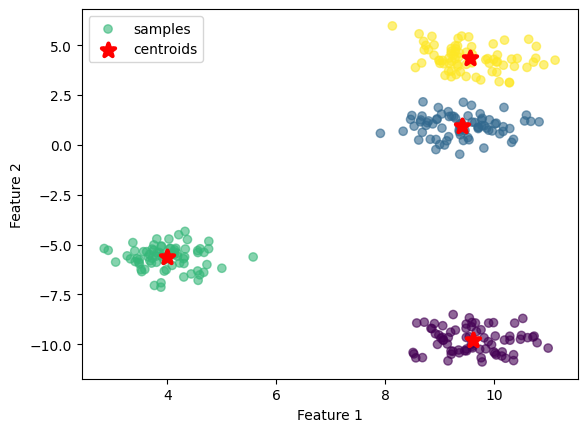

In [7]:
kmeans = KMeans(X)
kmeans.fit()
labels = kmeans.get_labels()

print("kmeans, default seed = 1:\n", kmeans.centroids)
plt.scatter(X[:,0],X[:,1],c=labels, cmap = 'viridis', alpha=0.6, label='samples')
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], linewidths=3, marker='*',s=100,c='r', label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


5. Fit the model on the dataset (seed=2) and plot the figure

kmeans, default seed = 2:
 [[ 9.6142291  -9.81108184]
 [ 3.98763431 -5.64641882]
 [ 9.40771062  0.93935012]
 [ 9.55224009  4.34589038]]


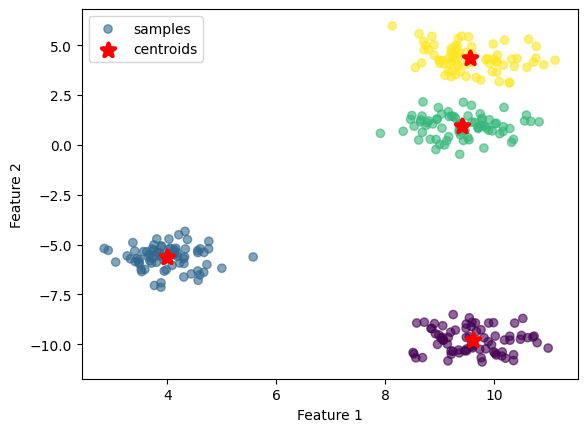

In [8]:
kmeans = KMeans(X)
kmeans.fit(seed=2)
labels = kmeans.get_labels()

print("kmeans, default seed = 2:\n", kmeans.centroids)
plt.scatter(X[:,0],X[:,1],c=labels, cmap = 'viridis', alpha=0.6, label='samples')
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], linewidths=3, marker='*',s=100,c='r', label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

6. Implement the K-means++ function return the labels and centers
7. Fit the model on the dataset (default seed) and plot the figure


kmeans++, default seed = 1:
 [[ 9.6142291  -9.81108184]
 [ 9.55224009  4.34589038]
 [ 9.40771062  0.93935012]
 [ 3.98763431 -5.64641882]]


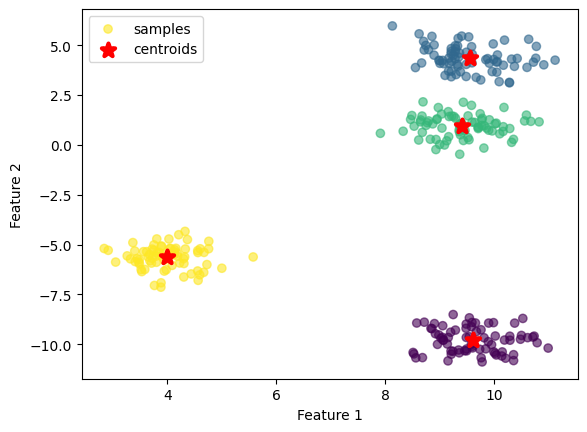

In [9]:
kmeans = KMeans(X)
kmeans.fit(kplus=True)
labels = kmeans.get_labels()

print("kmeans++, default seed = 1:\n", kmeans.centroids)
plt.scatter(X[:,0],X[:,1],c=labels, cmap = 'viridis', alpha=0.6, label='samples')
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], linewidths=3, marker='*',s=100,c='r', label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

8. Fit the model on the dataset (seed=2) and plot the figure

kmeans++, default seed = 2:
 [[ 9.55224009  4.34589038]
 [ 9.6142291  -9.81108184]
 [ 3.98763431 -5.64641882]
 [ 9.40771062  0.93935012]]


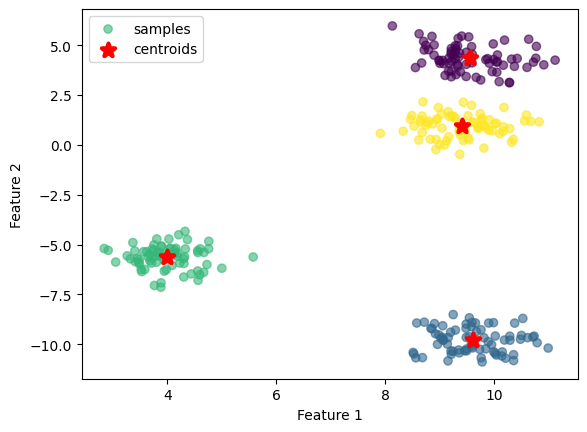

In [10]:
kmeans = KMeans(X)
kmeans.fit(seed=2,kplus=True)
labels = kmeans.get_labels()

print("kmeans++, default seed = 2:\n", kmeans.centroids)
plt.scatter(X[:,0],X[:,1],c=labels, cmap = 'viridis', alpha=0.6, label='samples')
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], linewidths=3, marker='*',s=100,c='r', label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

9. Compare the results from 4,5,7 and 8. State your observations

#### Observation:
- the dataset is too simple for any obvious differences in centroids.
- The random seed value affects the initialization of the centroids and, consequently, the final clustering results.
- but not too much.

In [11]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## RGB image dataset

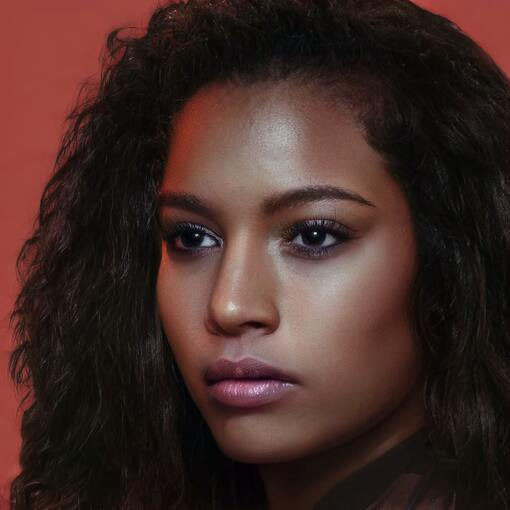

In [12]:
#img=Image.open("cropped.jpg")
img = Image.open("/content/gdrive/MyDrive/Colab Notebooks/AML_AS4/cropped.jpg")
display(img)
X = np.asarray(img).reshape((-1,3))

# kmeans2 = KMeans(X, clusters=5)
# kmeans2.fit()

In [16]:
def generate_result(X, img, seed=1, kplus=False, K=5):
  kmeans = KMeans(X,K)
  kmeans.fit(seed=seed,kplus=kplus)
  processed_img = np.asarray(img)

  print(f"seed: {seed}, whether k++ : {kplus}")

  # first of all, let us show the main color components
  colors = np.zeros((K,1,3), dtype = np.uint8)
  for i, color in enumerate(kmeans.centroids):
    colors[i] = color.astype(np.uint8).reshape((1,1,3))

  # fig, ax = plt.subplots()
  # ax.imshow(colors.squeeze())
  # ax.set_title('Colors of Main Components')
  # ax.set_xticks([])
  # ax.set_yticks(np.arange(K))
  # ax.set_yticklabels([f'Centroid {i+1}' for i in range(K)])
  plt.imshow(colors)

  # what about the new image?
  new_img = kmeans.centroids[kmeans.labels.astype(int)].reshape(processed_img.shape)
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  axs[0].imshow(processed_img)
  axs[0].set_title('Original Image')
  axs[1].imshow(new_img.astype(np.uint8))
  axs[1].set_title(f'New Image (K={K})')
  plt.show()

  #return new_img

* seed = 1(by default), do not use k++
initialization (by default), K=5.

seed: 1, whether k++ : False


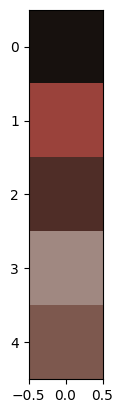

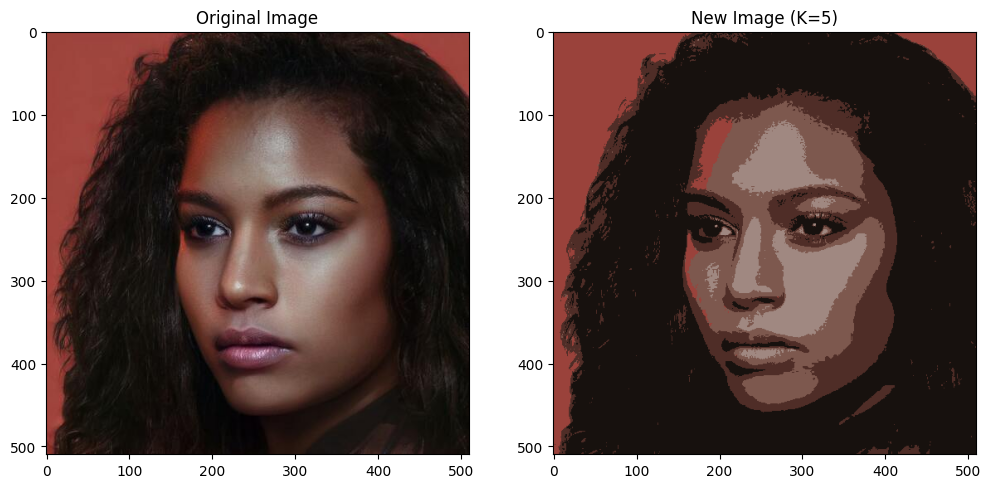

array([[[154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        ...,
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741]],

       [[154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        ...,
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741]],

       [[154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        ...,
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741],
        [154.72309264,  66.81294278,  59.23034741]],

       ...,

      

In [17]:
generate_result(X,img)

* seed = 2, do not use k++
initialization (by default), K=5.

seed: 2, whether k++ : False


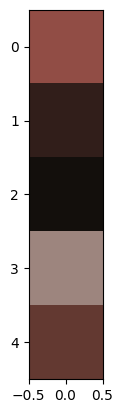

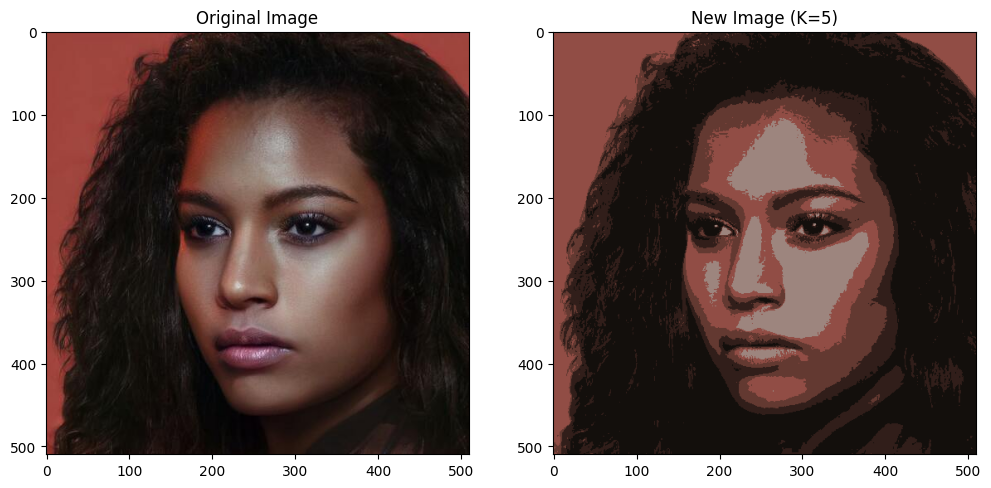

array([[[145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        ...,
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ]],

       [[145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        ...,
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ]],

       [[145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        ...,
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ]],

       ...,

      

In [18]:
generate_result(X,img,seed=2)

* seed = 1 (by default), use k++
initialization, K=5.

seed: 1, whether k++ : True


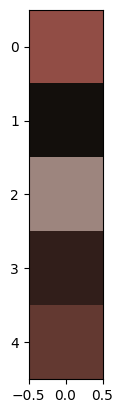

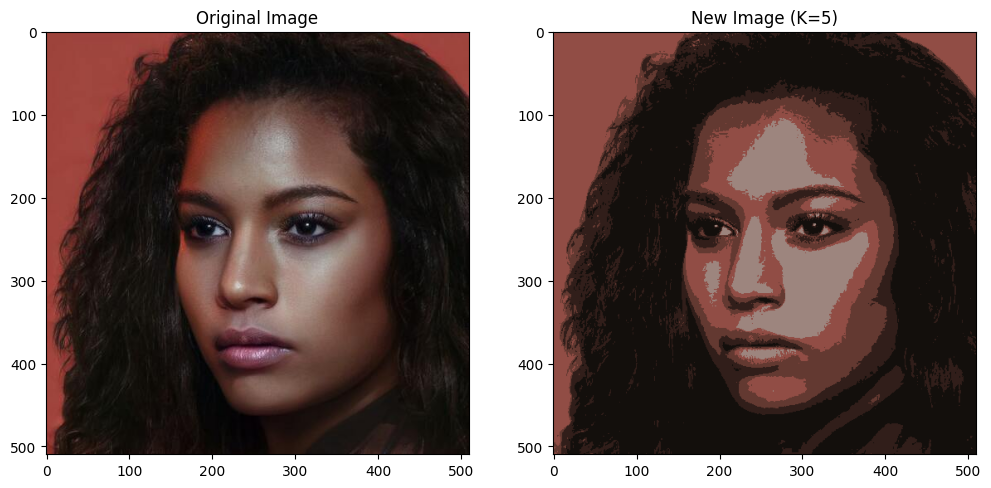

array([[[145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        ...,
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ]],

       [[145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        ...,
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ]],

       [[145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        ...,
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ],
        [145.51355878,  77.65930245,  69.1882752 ]],

       ...,

      

In [19]:
generate_result(X,img,kplus=True)

* seed = 2, use k++
initialization, K=5.

seed: 2, whether k++ : True


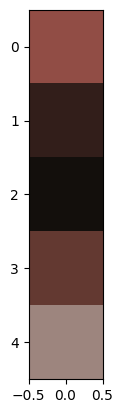

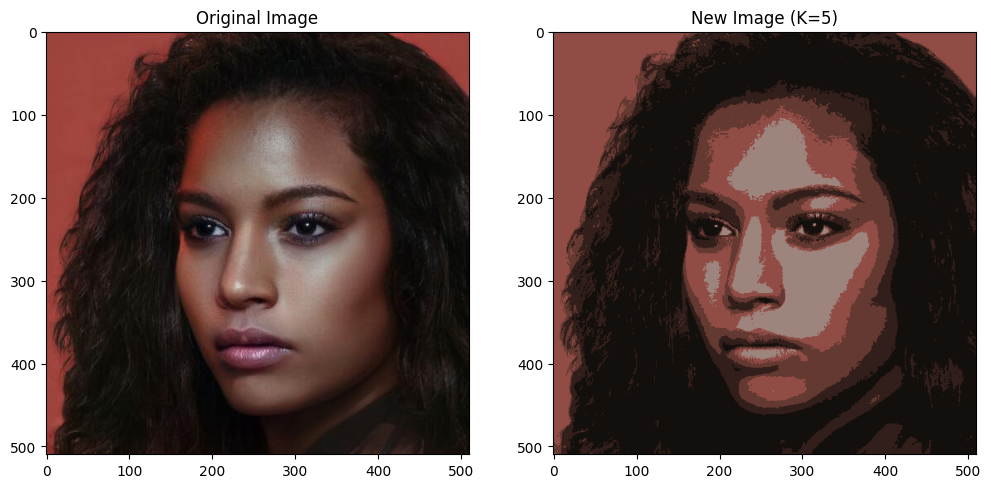

array([[[145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        ...,
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726]],

       [[145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        ...,
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726]],

       [[145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        ...,
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726],
        [145.60869658,  77.66885783,  69.19841726]],

       ...,

      

In [20]:
generate_result(X,img, seed=2,kplus=True)

**9. Compare the results from 4,5,7 and 8.**

In terms of the image: Apparently the results of them are quite similar, that by eyes, barely any differences between (default seed& k++), (seed 2 no k++) and (seed 2 & k++). seed 1 no k++ seems locate to a different centroid, so the color looks different than others, kinda dimmer, also others seems to capture the details of the image better (more vivid and contrasts) than the first one probably due to better initialization.

In terms of centroid assignment, the order of them are different, due to randomized initialization process. but colors look alike (besides seed 1 no k++).

#hierarchical
Ward’s method analyzes the variance of clusters. Ward’s is said to be the most suitable method for quantitative variables. Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them:



where mj⟶ is the center of cluster j, and nj is the number of points in it. Δ is called the merging cost of combining the clusters A and B. With hierarchical clustering, the sum of squares starts out at zero (because every point is in its own cluster) and then grows as we merge clusters. Ward’s method keeps this growth as small as possible.

The Euclidean distance is the “ordinary” straight-line distance between two points in Euclidean space.


—------

what we need:


1.   Ward function
2.   compute initial distances between all pairs of samples in X
3.   find pair result in smallest increase in ESS to merge
4.   perform clustering and linkage



Calculate the Ward distance between two clusters.
    
    Parameters:
    - cluster1: indices of data points in the first cluster
    - cluster2: indices of data points in the second cluster
    - data: the dataset containing all data points
    
    Returns:
    - The Ward distance between the two clusters
    

In [27]:
def ward(X, cluster1, cluster2):
    # Convert sets of indices to lists and use them to index X
    cluster1_points = X[list(cluster1)]
    cluster2_points = X[list(cluster2)]

    # Now we can safely use vstack
    bigCluster = np.vstack((cluster1_points, cluster2_points))

    mean1 = cluster1_points.mean(axis=0)
    mean2 = cluster2_points.mean(axis=0)
    bigmean = bigCluster.mean(axis=0)

    intraESS1 = np.sum((cluster1_points - mean1) ** 2)
    intraESS2 = np.sum((cluster2_points - mean2) ** 2)
    jointESS = np.sum((bigCluster - bigmean) ** 2)

    return jointESS - intraESS1 - intraESS2




###Distance matrix
    0   d12 d13 d14 d15
    d21 0   d23 d24 d25
    d31 d32 0   d34 d35
    d41 d42 d43 0   d45
    d51 d52 d53 d54 0

**output**:

dimension: number of samples * number of samples

In [22]:
def distance_matrix(X): # X.shape = nSamples, nFeatures
  samples = X.shape[0]
  distance_matrix = np.zeros((samples, samples))

  for i in range(samples):
    for j in range(samples):
      distance_matrix[i, j] = np.sqrt(np.sum((X[i]-X[j])**2))

  return distance_matrix


### Find pair
need to find the pair of clusters with min distance. Initially it is the pair of points, as the size of cluster = 1.

- input: X, sets of cluster
- return: index of the sets of cluster, minimum distance between them

In [23]:
def find_pair(X, clusterSets):
  minD = np.inf
  merge_pair = (None, None)
  for i in range(len(clusterSets)):
    for j in range(i+1, len(clusterSets)):
      distance = ward(X, clusterSets[i], clusterSets[j])
      if distance < minD: # update the min distance then
        minD = distance
        merge_pair = (i, j) # record the pair

  return merge_pair, minD


### clustering and linkage
> function to perform clustering and linkage

**input**: target number of cluster (by default = 1), X

**output**: linkage matrix

**do**: merging
- stopping critiria: merged untill reach the desired number of clusters (# of clusters)
- total iteration: # of samples - # of clusters
- linkage matrix:
  *  indices of the merged clusters
  *  distance between them
  * num of datapoints it contains

In [24]:
def clustering(X, target_clusters=1):
  samples = X.shape[0]
  nextID = samples


  # initializing the cluster sets (the mapping of unique id and cluster sets)
  clusterSets = {}
  for i in range(samples):
    clusterSets[i] = {i}

  # initializing the linkage matrix
  link = np.zeros((samples - target_clusters, 4))

  # now begin merging
  for itr in range(samples - target_clusters):

    clusterSetsList = list(clusterSets.values())

    (i, j), minD = find_pair(X, clusterSetsList)

    # get the ids of the clusters to merge
    clusterIDs = list(clusterSets.keys())
    key_i = clusterIDs[i]
    key_j = clusterIDs[j]


    # merging
    bigCluster = clusterSets[key_i].union(clusterSets[key_j])
    clusterSets[nextID] = bigCluster
    nextID += 1

    #removal
    del clusterSets[key_i], clusterSets[key_j]

    # update the linkage
    link[itr] = [key_i, key_j, minD, len(bigCluster)]

  return link



### Plot the graph
**input**: matrix of linkage

In [29]:
def plot_dendrogram(linkage):
  plt.figure()
  sch.dendrogram(linkage)
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Cluster ID')
  plt.ylabel('Distance')
  plt.show()


### Processing the data

data = pd.read_csv()

In [30]:
#file_path = 'Mall_Customers.csv'

file_path = '/content/gdrive/MyDrive/Colab Notebooks/AML_AS4/Mall_Customers.csv'
data = pd.read_csv(file_path)

data['Gender'] = data['Gender'].map({'Male': 1, 'Female':-1})
X = data.iloc[:, 1:].values

# by default, merge into 1 big cluster
linkage = clustering(X)


### codes for executing hierarchical clustering



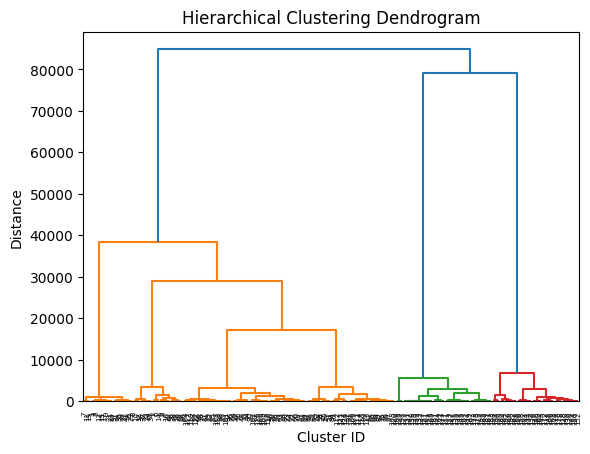

In [32]:
plot_dendrogram(linkage)